Found 3000 images belonging to 5 classes.
Found 2224 images belonging to 5 classes.
Epoch 1/20
93/93 [==============================] - 24s 241ms/step - loss: 0.8340 - accuracy: 0.6712 - val_loss: 0.0159 - val_accuracy: 0.9991

Epoch 00001: val_accuracy improved from -inf to 0.99909, saving model to mejor_modelo_CNN.keras
Epoch 2/20
93/93 [==============================] - 20s 217ms/step - loss: 0.1316 - accuracy: 0.9555 - val_loss: 0.0595 - val_accuracy: 0.9746

Epoch 00002: val_accuracy did not improve from 0.99909
Epoch 3/20
93/93 [==============================] - 20s 217ms/step - loss: 0.0747 - accuracy: 0.9720 - val_loss: 0.0011 - val_accuracy: 0.9995

Epoch 00003: val_accuracy improved from 0.99909 to 0.99955, saving model to mejor_modelo_CNN.keras
Epoch 4/20
93/93 [==============================] - 20s 215ms/step - loss: 0.0349 - accuracy: 0.9885 - val_loss: 5.0571e-04 - val_accuracy: 1.0000

Epoch 00004: val_accuracy improved from 0.99955 to 1.00000, saving model to mejor_mode

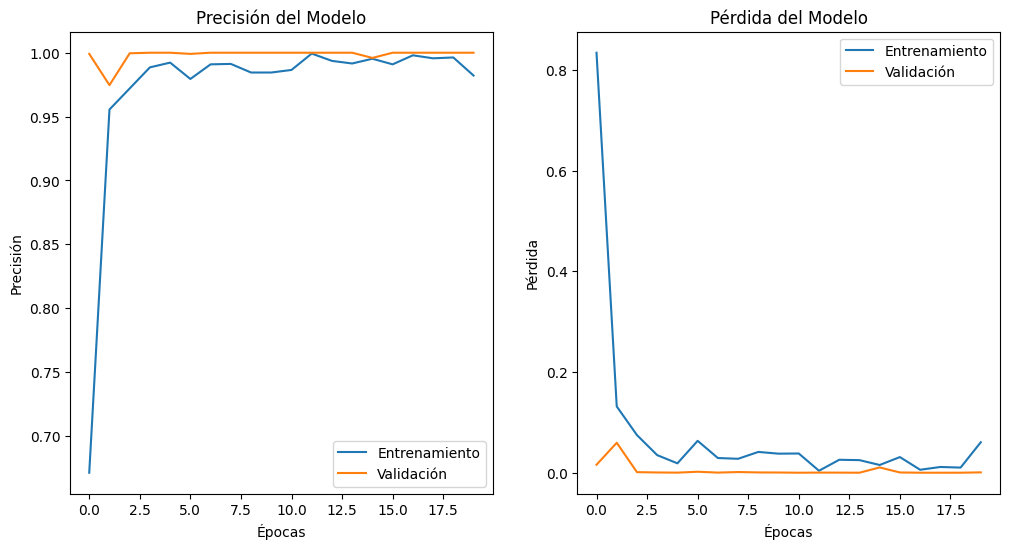

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Configurar el uso de la GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Establecer memoria de GPU dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Parámetros
img_size = (224, 224)
batch_size = 32
epochs = 20

# Rutas de los directorios de datos
train_dir = 'C:/Users/brand/OneDrive/Escritorio/Producto/DataPersonExperimento/ENTRENAMIENTO'
test_dir = 'C:/Users/brand/OneDrive/Escritorio/Producto/DataPersonExperimento/PRUEBA'

# Generadores de datos
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Definir el modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # Cambiado a 224x224
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])  # Cambiado de 'lr' a 'learning_rate'

# Configurar checkpoint para guardar el mejor modelo
checkpoint = ModelCheckpoint(
    'mejor_modelo_CNN.keras',  # Nombre del archivo donde se guardará el modelo
    monitor='val_accuracy', 
    save_best_only=True, 
    mode='max', 
    verbose=1
)

# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[checkpoint]
)

# Guardar el modelo entrenado completo
model.save('modelo_final_CNN.h5')

# Graficar precisión y pérdida
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


                 precision    recall  f1-score   support

   Alfredo_Daza       1.00      1.00      1.00       600
   Brando_Armas       1.00      1.00      1.00       600
   Edwin_Osorio       1.00      1.00      1.00       600
  Emanuel_Rojas       1.00      1.00      1.00       600
Jael_Estefanero       1.00      1.00      1.00       600

       accuracy                           1.00      3000
      macro avg       1.00      1.00      1.00      3000
   weighted avg       1.00      1.00      1.00      3000



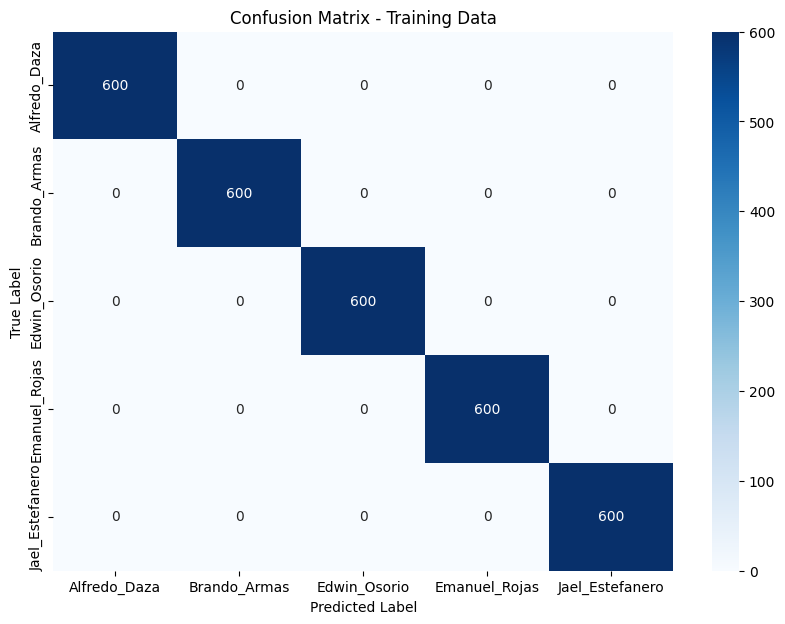

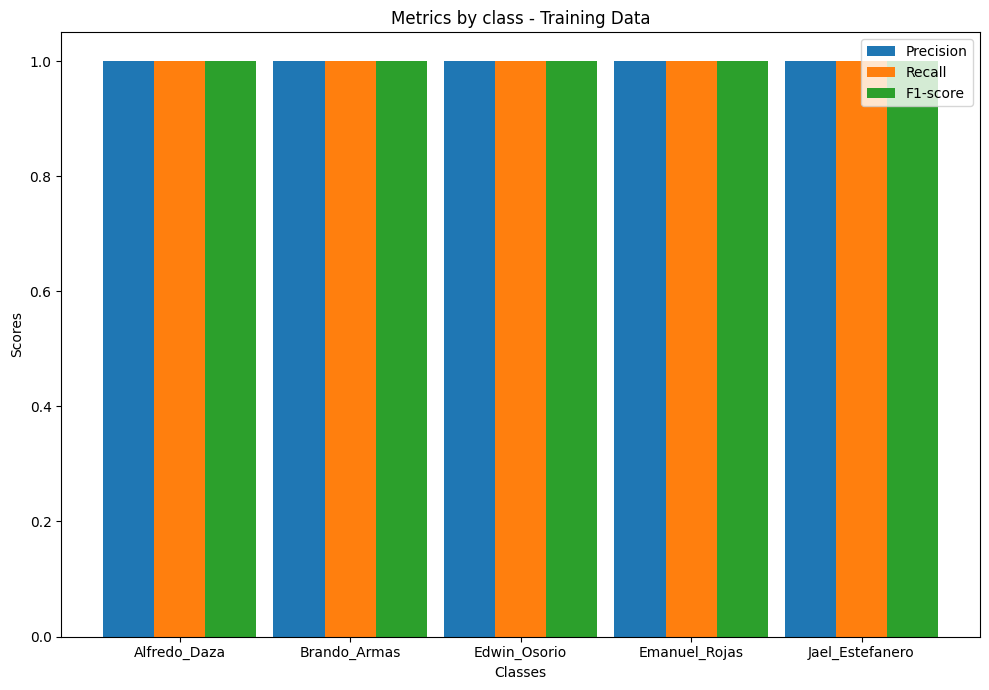

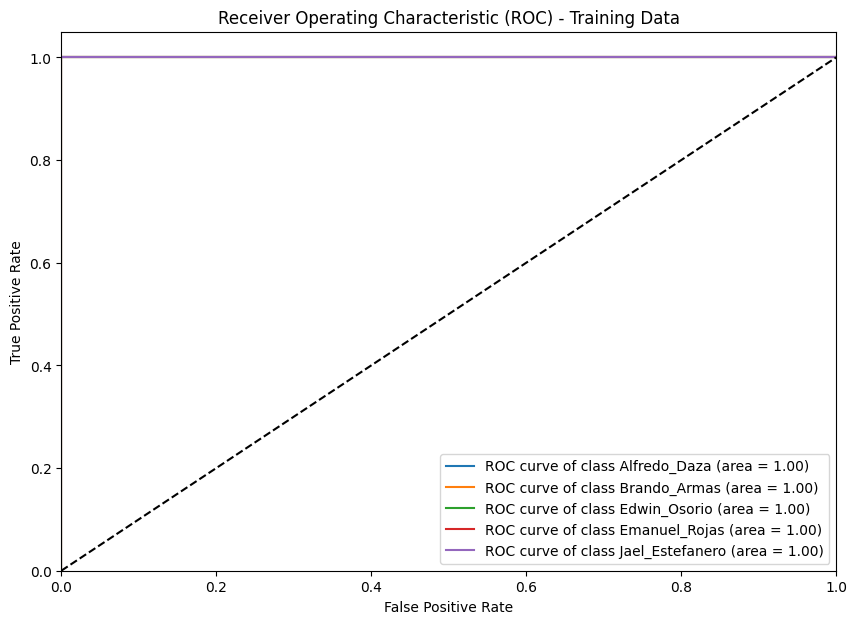

In [9]:
import numpy as np
import os
from PIL import Image
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical

# Función para cargar imágenes manteniendo el color
def load_images(directory, size=(150, 150)):
    images = []
    labels = []
    for label in os.listdir(directory):
        class_folder = os.path.join(directory, label)
        for filename in os.listdir(class_folder):
            filepath = os.path.join(class_folder, filename)
            img = Image.open(filepath).resize(size)
            images.append(np.array(img))
            labels.append(label)
    images = np.array(images) / 255.0  # Normalizar las imágenes
    return images, np.array(labels)

# Cargar datos de entrenamiento
train_images, train_labels = load_images('C:/Users/brand/OneDrive/Escritorio/Producto/DataPersonExperimento/ENTRENAMIENTO')

# Convertir etiquetas a categóricas
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)
train_labels_cat = to_categorical(train_labels_enc)

# Cargar el modelo entrenado
model = load_model('mejor_modelo_CNN.keras')

# Predecir clases en el conjunto de entrenamiento
train_predictions = model.predict(train_images)
train_predictions_classes = np.argmax(train_predictions, axis=1)

# Calcular y mostrar el informe de clasificación
print(classification_report(train_labels_enc, train_predictions_classes, target_names=label_encoder.classes_))

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(train_labels_enc, train_predictions_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Training Data')
plt.show()

# Visualizar precision, recall y F1-score por clase
report = classification_report(train_labels_enc, train_predictions_classes, target_names=label_encoder.classes_, output_dict=True)
precision = [report[label]['precision'] for label in label_encoder.classes_]
recall = [report[label]['recall'] for label in label_encoder.classes_]
f1_score = [report[label]['f1-score'] for label in label_encoder.classes_]

fig, ax = plt.subplots(figsize=(10, 7))
width = 0.3
x = np.arange(len(label_encoder.classes_))
ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1_score, width, label='F1-score')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Metrics by class - Training Data')
ax.set_xticks(x)
ax.set_xticklabels(label_encoder.classes_)
ax.legend()

fig.tight_layout()
plt.show()

# Generar curva ROC para cada clase
fpr = {}
tpr = {}
roc_auc = {}
for i, label in enumerate(label_encoder.classes_):
    fpr[label], tpr[label], _ = roc_curve(train_labels_cat[:, i], train_predictions[:, i])
    roc_auc[label] = auc(fpr[label], tpr[label])

plt.figure(figsize=(10, 7))
for label in label_encoder.classes_:
    plt.plot(fpr[label], tpr[label], label=f'ROC curve of class {label} (area = {roc_auc[label]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Training Data')
plt.legend(loc="lower right")
plt.show()


                 precision    recall  f1-score   support

   Alfredo_Daza       1.00      1.00      1.00       432
   Brando_Armas       1.00      1.00      1.00       445
   Edwin_Osorio       1.00      1.00      1.00       441
  Emanuel_Rojas       1.00      1.00      1.00       449
Jael_Estefanero       1.00      1.00      1.00       457

       accuracy                           1.00      2224
      macro avg       1.00      1.00      1.00      2224
   weighted avg       1.00      1.00      1.00      2224



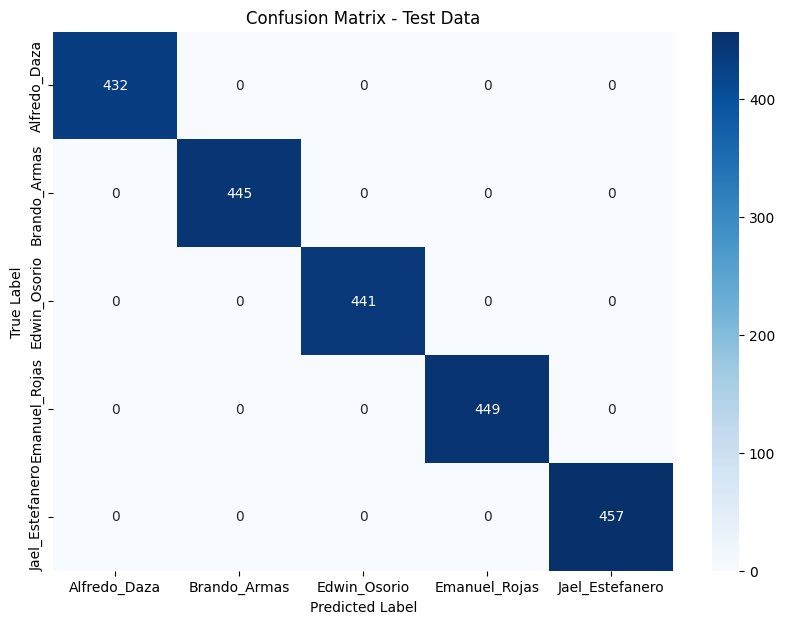

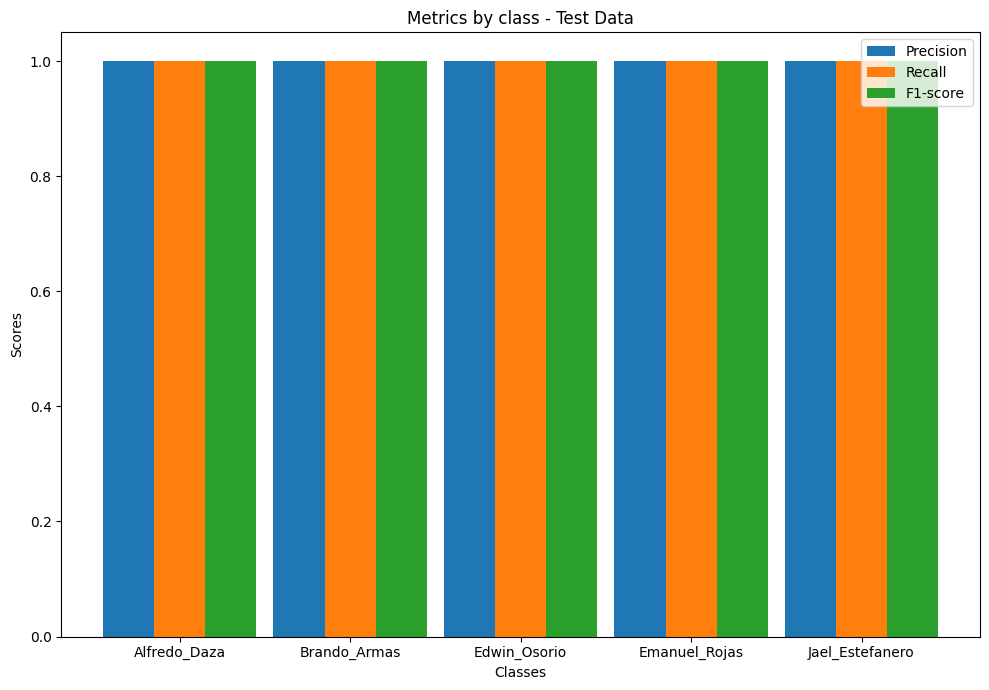

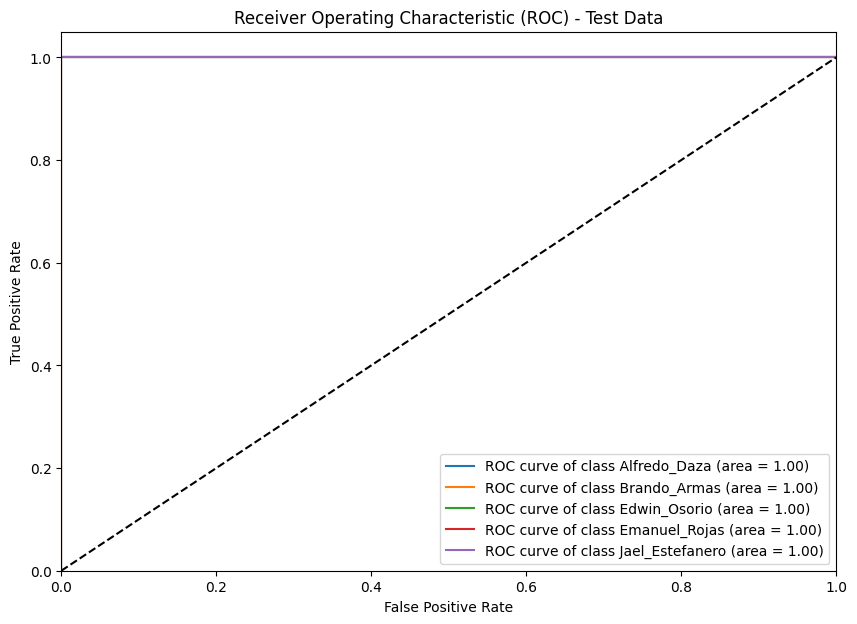

In [10]:
import numpy as np
import os
from PIL import Image
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical

# Función para cargar imágenes manteniendo el color
def load_images(directory, size=(150, 150)):
    images = []
    labels = []
    for label in os.listdir(directory):
        class_folder = os.path.join(directory, label)
        for filename in os.listdir(class_folder):
            filepath = os.path.join(class_folder, filename)
            img = Image.open(filepath).resize(size)
            images.append(np.array(img))
            labels.append(label)
    images = np.array(images) / 255.0  # Normalizar las imágenes
    return images, np.array(labels)

# Cargar datos de prueba
test_images, test_labels = load_images('C:/Users/brand/OneDrive/Escritorio/Producto/DataPersonExperimento/PRUEBA')

# Convertir etiquetas a categóricas
label_encoder = LabelEncoder()
test_labels_enc = label_encoder.fit_transform(test_labels)
test_labels_cat = to_categorical(test_labels_enc)

# Cargar el modelo entrenado
model = load_model('mejor_modelo_CNN.keras')

# Predecir clases en el conjunto de prueba
test_predictions = model.predict(test_images)
test_predictions_classes = np.argmax(test_predictions, axis=1)

# Calcular y mostrar el informe de clasificación
print(classification_report(test_labels_enc, test_predictions_classes, target_names=label_encoder.classes_))

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(test_labels_enc, test_predictions_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Data')
plt.show()

# Visualizar precision, recall y F1-score por clase
report = classification_report(test_labels_enc, test_predictions_classes, target_names=label_encoder.classes_, output_dict=True)
precision = [report[label]['precision'] for label in label_encoder.classes_]
recall = [report[label]['recall'] for label in label_encoder.classes_]
f1_score = [report[label]['f1-score'] for label in label_encoder.classes_]

fig, ax = plt.subplots(figsize=(10, 7))
width = 0.3
x = np.arange(len(label_encoder.classes_))
ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1_score, width, label='F1-score')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Metrics by class - Test Data')
ax.set_xticks(x)
ax.set_xticklabels(label_encoder.classes_)
ax.legend()

fig.tight_layout()
plt.show()

# Generar curva ROC para cada clase
fpr = {}
tpr = {}
roc_auc = {}
for i, label in enumerate(label_encoder.classes_):
    fpr[label], tpr[label], _ = roc_curve(test_labels_cat[:, i], test_predictions[:, i])
    roc_auc[label] = auc(fpr[label], tpr[label])

plt.figure(figsize=(10, 7))
for label in label_encoder.classes_:
    plt.plot(fpr[label], tpr[label], label=f'ROC curve of class {label} (area = {roc_auc[label]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Data')
plt.legend(loc="lower right")
plt.show()


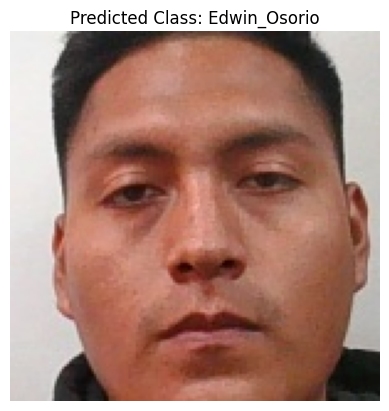

Predicted Label: Edwin_Osorio
Prediction Confidence: 100.00%


In [5]:
import numpy as np
import os
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Función para cargar imágenes manteniendo el color
def load_images(directory, size=(224, 224)):  # Cambiado a 224x224
    images = []
    labels = []
    for label in os.listdir(directory):
        class_folder = os.path.join(directory, label)
        for filename in os.listdir(class_folder):
            filepath = os.path.join(class_folder, filename)
            img = Image.open(filepath).resize(size)
            images.append(np.array(img))
            labels.append(label)
    return np.array(images), np.array(labels)

# Función para cargar una imagen y mantener el color
def load_single_image(filepath, size=(224, 224)):  # Cambiado a 224x224
    img = Image.open(filepath).resize(size)
    return np.array(img)

# Cargar el modelo entrenado
model = load_model('modelo_final_CNN.h5')

# Cargar datos y etiquetas para preparar la predicción
train_images, train_labels = load_images('C:/Users/brand/OneDrive/Escritorio/Producto/DataPersonExperimento/ENTRENAMIENTO')

# Etiquetas
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)

# Función para predecir la clase de una imagen
def predict_image_class(image_path):
    # Cargar y preprocesar la imagen
    image = load_single_image(image_path)
    image = image.reshape(1, 224, 224, 3) / 255.0  # Reshape y normalización

    # Predecir la clase de la imagen
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)
    predicted_label = label_encoder.inverse_transform([predicted_class])[0]
    
    # Mostrar la imagen y la predicción
    plt.imshow(Image.open(image_path))
    plt.title(f'Predicted Class: {predicted_label}')
    plt.axis('off')
    plt.show()
    
    print(f'Predicted Label: {predicted_label}')
    print(f'Prediction Confidence: {np.max(prediction)*100:.2f}%')

# Ejemplo de uso
image_path = 'C:/Users/brand/OneDrive/Escritorio/Producto/rotro_8.jpg'
predict_image_class(image_path)


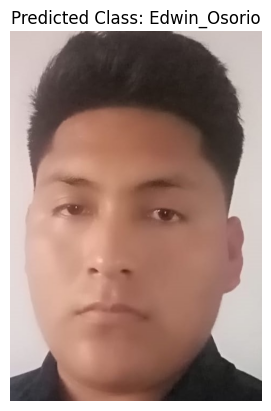

Predicted Label: Edwin_Osorio
Prediction Confidence: 93.83%


In [1]:
import numpy as np
import os
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Función para cargar imágenes manteniendo el color
def load_images(directory, size=(224, 224)):  # Cambiado a 224x224
    images = []
    labels = []
    for label in os.listdir(directory):
        class_folder = os.path.join(directory, label)
        for filename in os.listdir(class_folder):
            filepath = os.path.join(class_folder, filename)
            img = Image.open(filepath).resize(size)
            images.append(np.array(img))
            labels.append(label)
    return np.array(images), np.array(labels)

# Función para cargar una imagen y mantener el color
def load_single_image(filepath, size=(224, 224)):  # Cambiado a 224x224
    img = Image.open(filepath).resize(size)
    return np.array(img)

# Cargar el modelo entrenado
model = load_model('modelo_final_CNN.h5')

# Cargar datos y etiquetas para preparar la predicción
train_images, train_labels = load_images('C:/Users/brand/OneDrive/Escritorio/Producto/DataPersonExperimento/PRUEBA')

# Etiquetas
label_encoder = LabelEncoder()
train_labels_enc = label_encoder.fit_transform(train_labels)

# Función para predecir la clase de una imagen
def predict_image_class(image_path):
    # Cargar y preprocesar la imagen
    image = load_single_image(image_path)
    image = image.reshape(1, 224, 224, 3) / 255.0  # Reshape y normalización

    # Predecir la clase de la imagen
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)
    predicted_label = label_encoder.inverse_transform([predicted_class])[0]
    
    # Mostrar la imagen y la predicción
    plt.imshow(Image.open(image_path))
    plt.title(f'Predicted Class: {predicted_label}')
    plt.axis('off')
    plt.show()
    
    print(f'Predicted Label: {predicted_label}')
    print(f'Prediction Confidence: {np.max(prediction)*100:.2f}%')

# Ejemplo de uso
image_path = 'C:/Users/brand/OneDrive/Escritorio/Producto/imagen4.jpg'
predict_image_class(image_path)
